In [8]:
print("Lecture-21")

Lecture-21


### Evrişim Sinir Ağları (Convolutional Neural Networks)

Sayısal sinyal işleme (digital signal processing) alanında evrişim (convolutional) işlemleri ile çok karşılaşılmaktadır. Evrişim işlemi başta görsel veriler olmak üzere metinsel, işitsel (audio) ve hareketli görüntü (video) verilerine uyuglanabilen bir tekniktir. Evrişimin görüntü verilerin uyuglanması en yaygın kullanım biçimidir. Evrişim işlemi ile görüntü yerel öğelere duyarlı hale getirilebilmektedir.

Görüntü verileri üzerinde evirşim işlemi, evrişime sokulacak görüntü matrisinin filtre matrisi ya da "kernel" denilen küçük bir matrisle kaydırmalı biçimde işleme sokulmasıyla gerçekleştirilmektedir. Evrişim işlemi gri tonlamalı görüntü verileri üzerinde tipik olarak yürütülebilmektedir:
- Kernel matrisi oluşturulur. Sonra bu filtreleme matrisi görüntünün üzerine bindirilierek görüntünün filtre matrisi ile çakışan kısmı işleme sokulur. Her işlem sonucunda tek bir değer elde edilmektedir. Sonra bu filtreleme matrisi görüntü üzerinde sağa ve aşağıya kaydırılarak işlemler devam ettirilir. Filtreleme matrisi ile görüntünün ilgili kısmı üzerinde yapılan işlem genellikle "dot product" biçimindedir. 

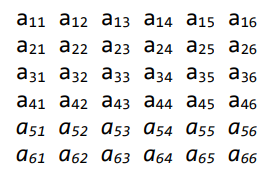

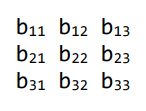 (filtreleme amtrisi)

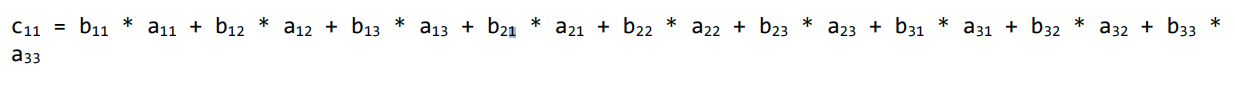

örneğin filreleme matrisini 1 sağa kaydırılmış olalım.

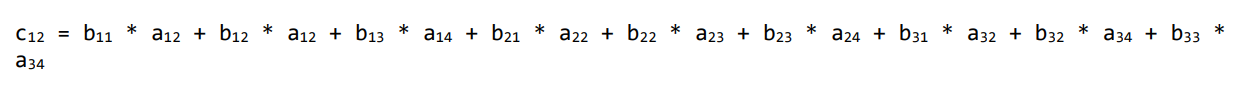

eğer kare matris olmazlarsa:

evrişilmiş matrisin satır uzunluğu = görüntü matrisinin satır uzunluğu - filtre matrisinin satır uzunluğu + 1

evrişilmiş matrisin sütun uzunluğu = görüntü matrisinin sütun uzunluğu - filtre matrisinin sütun uzunluğu + 1

filtre matrisi genel olarak tek sayı olarak ele alınır --> (3x3), 5x5, 7x7 

Eğer evrişilmiş hedef matrisin görüğntü matrisi ile aynı büyükjlkükte olması isteniyorsa görüntü matrisinin filtreleme marisinin satır ve sütun uzunluığunba dayalı olarak iki taraftan uzatılması gerekir. Buna "padding" denilmektedir. örneğin matris sütunlarınnı soluna ve saına, yukarısına ve aşağısına içi sıfırlarla dolu sütunlar ve satırlar eklenerek paddinbg yapılabilir. 

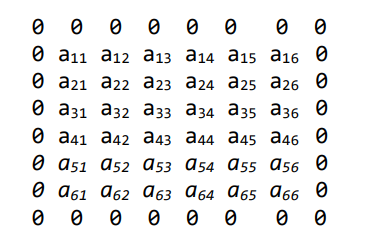

In [9]:
import numpy as np

def conv(image, filter):
    image_height = image.shape[0]
    image_width = image.shape[1]
    filter_height = filter.shape[0]
    filter_width = filter.shape[1]
    
    conv_height = image_height - filter_height + 1
    conv_width = image_width - filter_width + 1
    conv_image = np.zeros((conv_height, conv_width), dtype=np.uint8)
    
    for row in range(conv_height):
        for col in range(conv_width):
            dotp = 0
            for i in range(filter_height):
                for j in range(filter_width):
                    dotp += image[row + i, col + j] * filter[i, j]
            conv_image[row, col] = np.clip(dotp, 0, 255)
    return conv_image

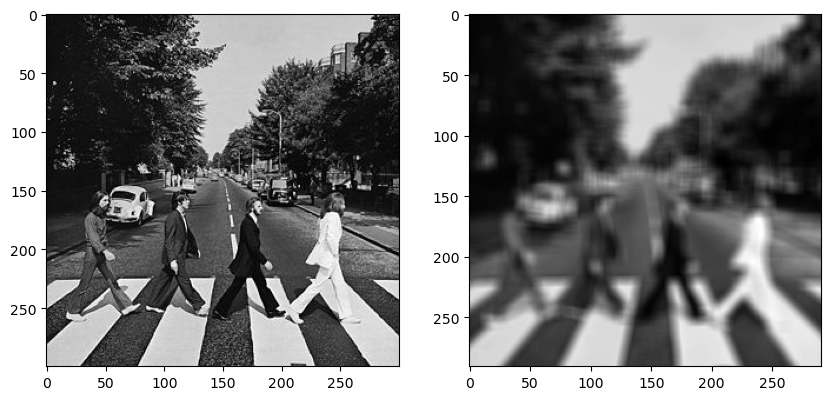

In [15]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img_data = imread('Beatles_Abbey_Road.jpg')
gray_img_data = np.average(img_data, weights=[0.3, 0.59, 0.11], axis = 2)

blur_filter = np.full((10, 10), 1 / 100)
img_conv = conv(gray_img_data, blur_filter)

figure = plt.gcf()
figure.set_size_inches((10, 10))
plt.subplot(1, 2, 1)
plt.imshow(gray_img_data, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(img_conv, cmap='gray')
plt.show()

In [11]:
img_data.shape

(300, 300, 3)

In [13]:
gray_img_data.shape

(300, 300)

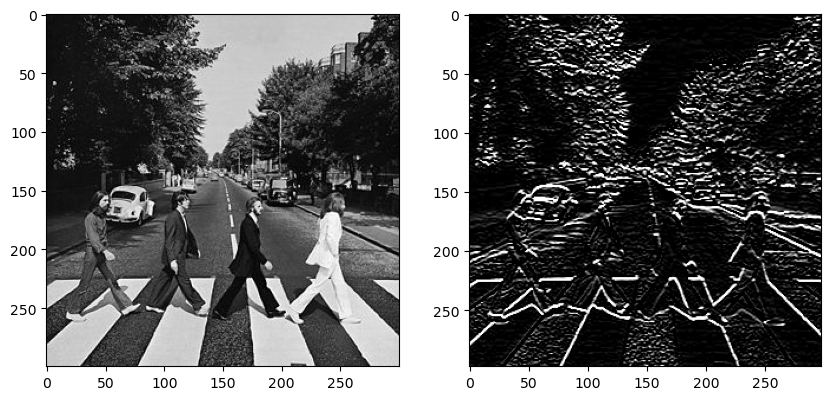

In [17]:
sobel_filter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
img_conv = conv(gray_img_data, sobel_filter)

figure = plt.gcf()
figure.set_size_inches((10, 10))
plt.subplot(1, 2, 1)
plt.imshow(gray_img_data, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(img_conv, cmap='gray')
plt.show()

evrişim işlemi gri tonlamalı resimler yerine renkli (yani RGB bileşeni içeren) resimler üzerinde de yapılabilmektedir. Gri tonlamalı resimlerdeki NxN'lik filtreleme matrisleri renkli resimlerde NXNX3 biçiminde üç katmanlı olarak oluşturulmaktadır. 3x3x3

Dot product işleminde sanki üç ayrı resim varmış gibi her renk bileşeni farklı bir filtre matrisiyle dot product işlemine sokulur, buradan hedef pixel'i belirten 3 değer elde edilir.

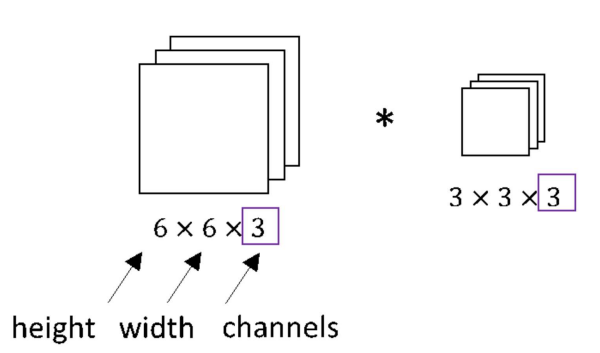

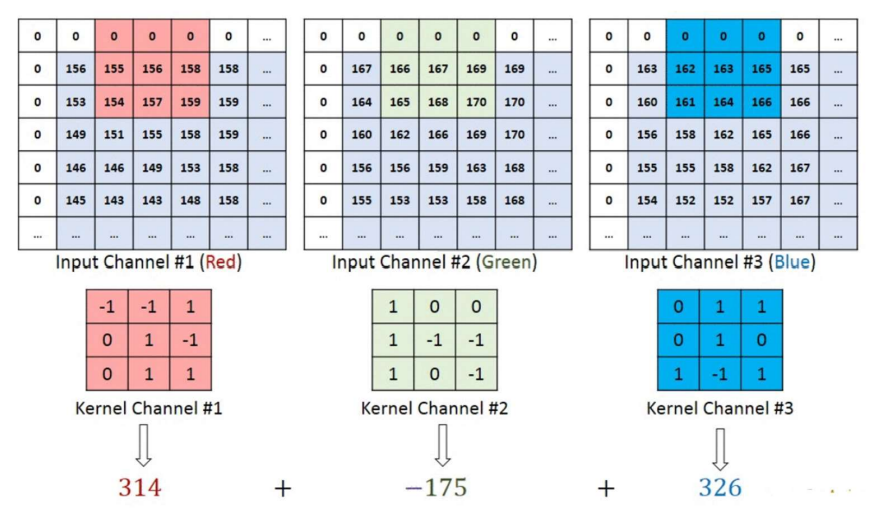

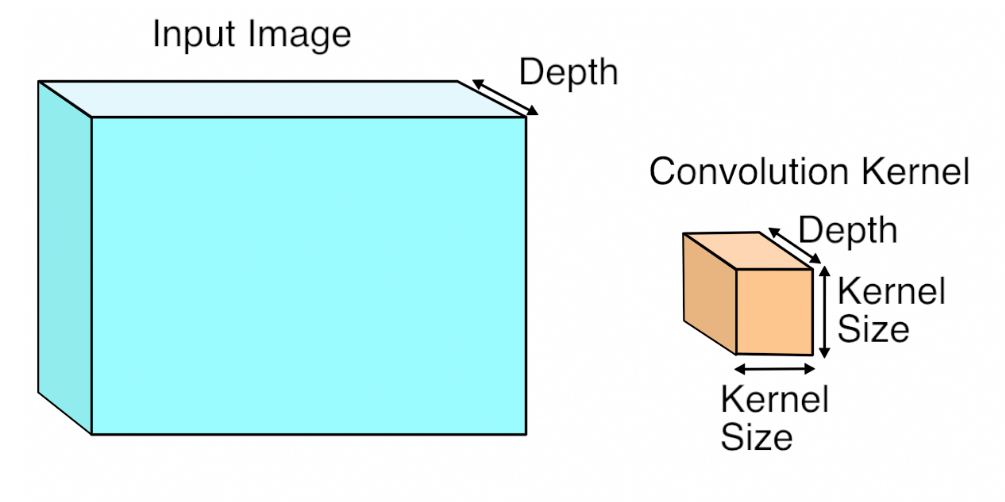

Görüntü işlemede kişi belli filtreleri belirleyerek bunu resme uygulamak isteyebilir. Halbuki yapay sinir ağlarında filtreleme matrisinin kendisini sinir ağı bulmaya çalışmaktadır. Yani YSA işlemler terstan yapılmaktadıri. Biz evrişim işlemini yaptığımızı varsayarak bir ağ modeli oluştururuz sonra ağımızı eğitiriz. bu eğitime göre ağ kendisi bir filtreleme matrisini oluşturur. çünkü yapay sinir ağlarında biz aslında neyin filtreleneceğini bilmemekteyiz. 

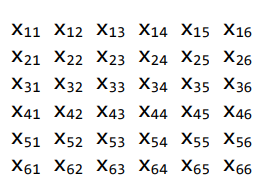

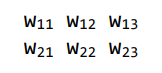
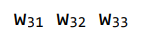

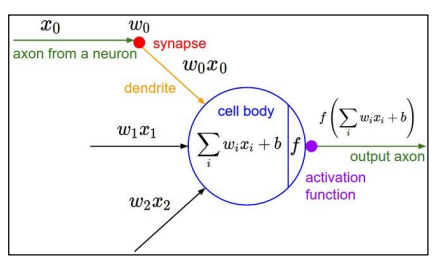

evrişim işlemini yapanj klatmana ysa'da evrişim katmanı (convolution layer)" denilmektedir. Evrişim katmanlarında katmana ilişkin tüm nöronların bias değerleri aynıdır.

Evrişim katmanındaki nöron sayısı evrişim sonucunda elde edilcek görüntünün pixel sayısı kadar olacaktır.

Ayrıca görüntü tanımaya ilişkin ağlarda yalnızca evirşimslel katmanların kullaınlması da uygun değildir. Çünkü bu durumda resmin bütünnüe ilişkin global özellikler gözdern kaçırılmış olur. Bu nedenle bu tür ağların mimarilerinde genellikle önce birkaç evrişimsel katman daha sonra bir ya da birtden fazla "dense" katman kullanılmatkadır. Böylece hem yerel özellikler hem de global özellikler ağ tarafından tanınabilir.

Keras'ta Evrişimsel Sinir Ağlarının Oluşturulması